### MACHINE LEARNING MODELS FOR THE DIABETES DATASET (RAW)

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import shap
import matplotlib.pyplot as plt
import seaborn as sns

2023-06-28 17:23:30.250236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 17:23:30.508377: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba

**Set seeds for the different libraries that need it. To ensure reproducibility of the results**

In [4]:
random_seed = 14
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

**Load the dataset**

In [9]:
df = pd.read_csv("diabetes_data_raw.csv", sep=",")

**We check that we have loaded the dataset correctly by showing the first 5 rows of the dataset**

In [10]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**We explore the original dataset**

In [11]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

**Check if there is any data that is null to eliminate it, if it exists:**

In [12]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Eliminate duplicate data if any**

In [13]:
df.drop_duplicates(inplace=True)

**Convert categorical variables to factors:**

In [14]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Polyuria"] = df["Polyuria"].astype("category").cat.codes
df["Polydipsia"] = df["Polydipsia"].astype("category").cat.codes
df["sudden weight loss"] = df["sudden weight loss"].astype("category").cat.codes  
df["weakness"] = df["weakness"].astype("category").cat.codes
df["Polyphagia"] = df["Polyphagia"].astype("category").cat.codes
df["Genital thrush"] = df["Genital thrush"].astype("category").cat.codes


df["visual blurring"] = df["visual blurring"].astype("category").cat.codes
df["Itching"] = df["Itching"].astype("category").cat.codes
df["Irritability"] = df["Irritability"].astype("category").cat.codes
df["delayed healing"] = df["delayed healing"].astype("category").cat.codes
df["partial paresis"] = df["partial paresis"].astype("category").cat.codes  
df["muscle stiffness"] = df["muscle stiffness"].astype("category").cat.codes
df["Alopecia"] = df["Alopecia"].astype("category").cat.codes
df["Obesity"] = df["Obesity"].astype("category").cat.codes

df["class"] = df["class"].astype("category").cat.codes

In [15]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**Next, we must do the scaling on train, we apply it, and we do the scaling again on test. We split the dataset into train and test**

In [16]:
X = df.drop(["class"], axis=1)
y = df["class"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random.seed(random_seed), stratify=y)

In [17]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**We check that the shapes of the splitted sets are correct as expected**

In [18]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (188, 16)
X_test shape: (63, 16)
y_train: (188,)
y_test shape: (63,)


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [14]:
y_pred_logistic = model.predict(X_test)

We evaluate the model obtained:

In [15]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)

Accuracy: 0.8412698412698413
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.95      0.81      0.88        43

    accuracy                           0.84        63
   macro avg       0.82      0.86      0.83        63
weighted avg       0.87      0.84      0.85        63



### KNN

We choose the different parameters for gridSearch

In [16]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [17]:
knn = KNeighborsClassifier()

We create the GridSearch object

In [18]:
# refit equals true, to train with all the data
grid_search = GridSearchCV(knn, param_grid, cv=5, refit=True)

We make the model fit

In [19]:
grid_search.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9ed6f0ac20>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [20]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy score: 0.9307254623044097


Get the best model and its predictions

In [21]:
best_model_knn = grid_search.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Evaluate the best model over test partition

In [22]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.8253968253968254
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.78        20
           1       1.00      0.74      0.85        43

    accuracy                           0.83        63
   macro avg       0.82      0.87      0.82        63
weighted avg       0.89      0.83      0.83        63



### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [23]:
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [24]:
model_ct = DecisionTreeClassifier(random_state=14)

We create the GridSearch object

In [25]:
grid_search = GridSearchCV(model_ct, param_grid, cv=5)

We make the model fit

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [27]:
best_model_ct = grid_search.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [28]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.90      0.81      0.85        43

    accuracy                           0.81        63
   macro avg       0.78      0.81      0.79        63
weighted avg       0.82      0.81      0.81        63



### RANDOM FOREST

We choose the different parameters for gridSearch

In [29]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [30]:
rfc = RandomForestClassifier(random_state=42)

We create the GridSearch object

In [31]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)

We make the model fit

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [33]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy score: 0.9415362731152206


In [34]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [35]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.95      0.91      0.93        43

    accuracy                           0.90        63
   macro avg       0.88      0.90      0.89        63
weighted avg       0.91      0.90      0.91        63



### SVM (Support Vector Machine)

In [36]:
param_grid = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [37]:
svm = SVC()

In [38]:
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [40]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score: 0.9364153627311522


In [41]:
best_model_svm = grid_search.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [42]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8412698412698413
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.90      0.86      0.88        43

    accuracy                           0.84        63
   macro avg       0.81      0.83      0.82        63
weighted avg       0.85      0.84      0.84        63



### NEURAL NETWORK:

We start creating the model function

In [118]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search = GridSearchCV(model_nn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search.best_params_
best_params_nn

Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.6560
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.6720
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.6720
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7120
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8480
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.9120
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9600
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9600
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1887 - accuracy: 0.9600
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.8889
Epoch 1/10
8/8 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8889
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.7143
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7143
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7937
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8730
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9286
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9524
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9603
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9603
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9524
Epoch 10/10
4/4 [==============================] - 

8/8 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9920
Epoch 12/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9920
Epoch 13/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9920
Epoch 14/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 15/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 16/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 17/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 18/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 19/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.9048
Epoch 1/20
8/8 [==========================

8/8 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9760
Epoch 24/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920
Epoch 25/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 26/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 27/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 28/30
8/8 [==============================] - 0s 939us/step - loss: 0.0284 - accuracy: 1.0000
Epoch 29/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 30/30
4/4 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.9048
Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6746
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.6746
Epoch 3/30
8/8 [==========================

8/8 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9680
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9840
Epoch 17/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9920
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9920
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9920
Epoch 20/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 1.0000
Epoch 21/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 22/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 23/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 24/30
8/8 [==============================] - 0s 991us/step - loss: 0.0177 - accuracy: 1.0000
Epoch 25/30
8/8 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.6984
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.7460
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.9194
Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6960
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7680
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.6960
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7120
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7840
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8320
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.9200
Epoch 8/10
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9520
Epoch 18/20
4/4 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9520
Epoch 19/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9600
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8889
Epoch 1/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6480
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7360
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7360
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7360
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7360
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.7360
Epoch 7/20
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9762
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9355
Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6320
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6640
Epoch 3/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.6640
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.6640
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.6640
Epoch 6/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.6720
Epoch 7/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7520
Epoch 8/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8320
Epoch 9/30
4/4 [==============================] - 

4/4 [==============================] - 0s 1ms/step - loss: 0.2146 - accuracy: 0.9524
Epoch 14/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9524
Epoch 15/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9524
Epoch 16/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9603
Epoch 17/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9603
Epoch 18/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9524
Epoch 19/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9683
Epoch 20/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9683
Epoch 21/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9762
Epoch 22/30
4/4 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9683
Epoch 23/30
4/4 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.6746
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.6746
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.6746
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.6746
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.6984
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.7540
Epoch 10/10
1/1 [==============================] - 0s 58ms/step - loss: 0.3554 - accuracy: 0.8710
Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7319 - accuracy: 0.3680
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.7360
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.7520
Epoch 4/10
2/2 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6640
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.6640
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.6720
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7120
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8400
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8640
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8800
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8800
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8960
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9360
Epoch 14/20
2/2 [==============================

2/2 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9280
Epoch 19/30
2/2 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.9280
Epoch 20/30
2/2 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.9280
Epoch 21/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9280
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9280
Epoch 23/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9280
Epoch 24/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9280
Epoch 25/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9360
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9440
Epoch 27/30
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9440
Epoch 28/30
2/2 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.6915
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.6915
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.6915
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.6915
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.7553
Epoch 7/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8564
Epoch 8/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8830
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9255
Epoch 10/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9309
Epoch 11/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9362
Epoch 12/30
3/3 [==============================] 

{'batch_size': 64, 'epochs': 30, 'hidden_units': 256}

In [133]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4947
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6915
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6915
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.6915
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.6915
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.6968
Epoch 7/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7553
Epoch 8/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7979
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8564
Epoch 10/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8883
Epoch 11/30
3/3 [======================

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (precision*100))
print('Recall: %.2f' % (recall*100))
print('F1-score: %.2f' % (f1*100))

2/2 [==============================] - 0s 1ms/step
Accuracy: 85.71
Precision: 97.22
Recall: 81.40
F1-score: 88.61


In [135]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy*100:.2f}%')

Best Parameters:  {'batch_size': 64, 'epochs': 30, 'hidden_units': 256}
Test Accuracy: 85.71%


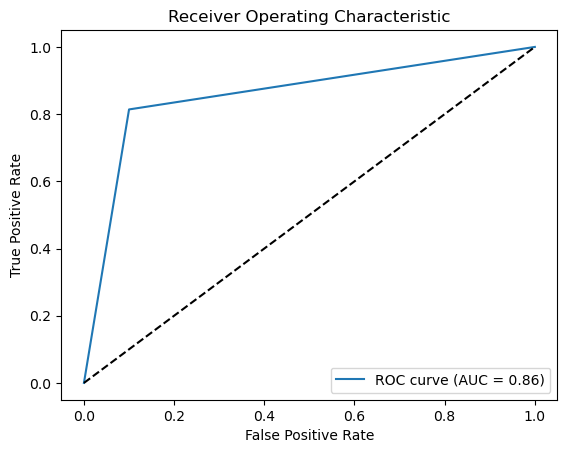

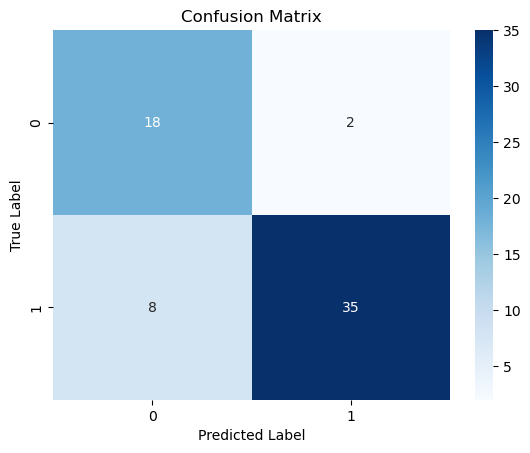

In [142]:
# Obtener las probabilidades de predicción
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Paso 6: Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred_prob)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### AdaBoost (Adaptative Boosting):

In [62]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search = GridSearchCV(ada_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy = best_ada_boost.score(X_test, y_test)-
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


Test Accuracy: 80.95%


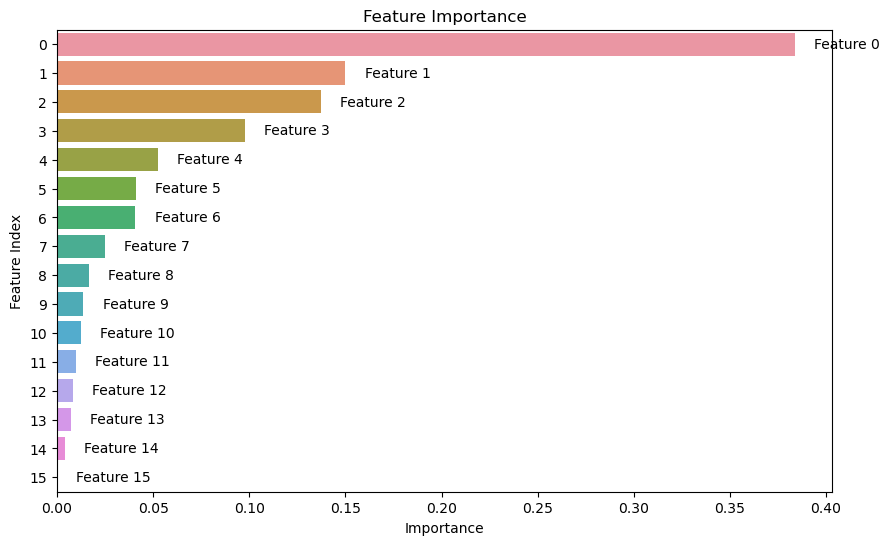

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the best AdaBoost model
feature_importances = best_ada_boost.feature_importances_

# Create an array of numerical indices for the features
feature_indices = np.arange(len(feature_importances))

# Sort the feature importances and indices in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=feature_indices, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Index')

# Add the feature indices as text labels on the bars
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.01, i, f'Feature {i}', va='center')

plt.show()


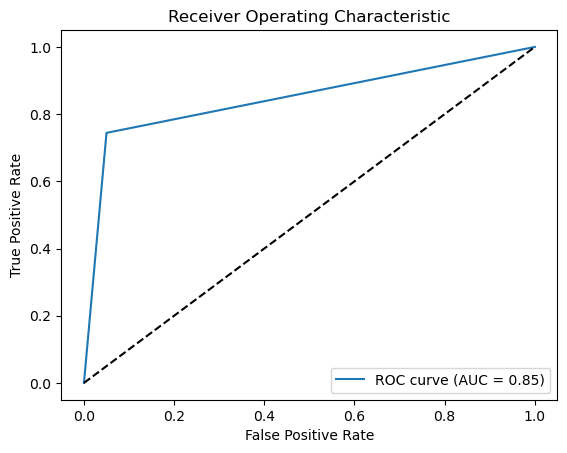

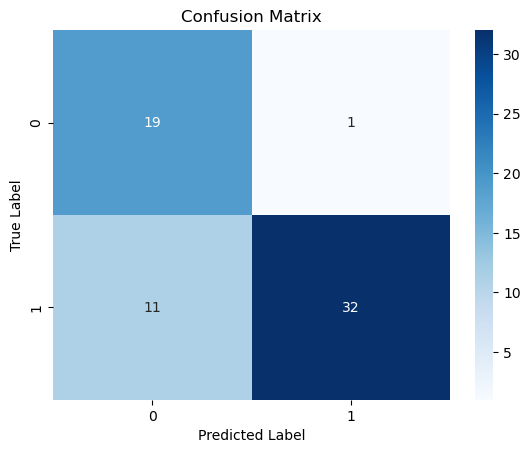

In [139]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_ada_boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [69]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 85.71%


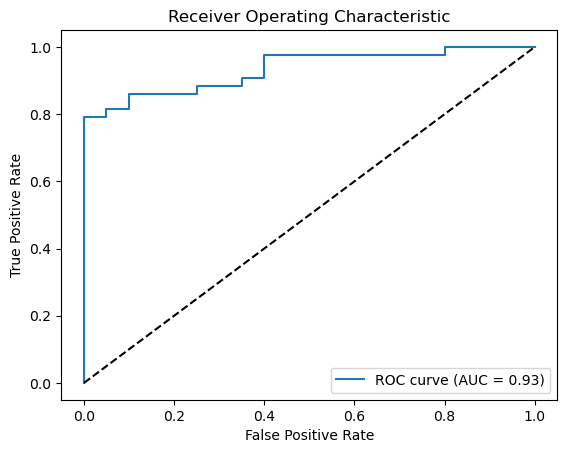

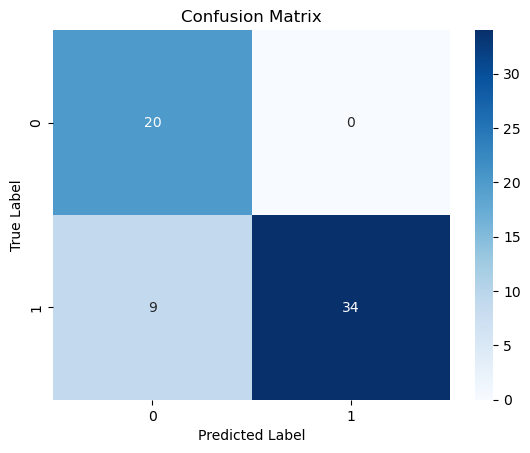

In [70]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_gradient_boosting.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Shap Values NN

In [145]:
# Inicializamoss SHAP explainer
explainer = shap.DeepExplainer(best_model_nn, X_train)
# Calculamos SHAP values
shap_values_nn = explainer.shap_values(X_test)

In [146]:
df.keys()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [147]:
df_shap_nn = pd.DataFrame(shap_values_nn[0], columns = df.keys()[:-1])
df_shap_nn.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.004040,-0.139001,-0.194746,-0.169003,-0.086366,0.006573,-0.091516,-0.075955,-0.067525,0.149195,0.144796,0.010927,0.061758,0.021185,-0.002808,0.072986
1,0.006901,0.164167,-0.175760,-0.172369,-0.089695,0.002942,-0.080704,-0.051861,0.024456,-0.123878,-0.047003,-0.039761,-0.053260,-0.045701,-0.052087,0.045802
2,0.001551,0.064303,-0.009204,0.084062,0.049496,-0.002001,0.029296,0.048811,0.009345,-0.018811,0.043467,-0.001183,-0.004365,-0.009770,0.013506,-0.001235
3,0.008451,-0.084481,-0.161708,-0.146701,-0.069392,-0.010933,0.057144,-0.042619,0.005448,-0.080921,-0.039458,-0.026944,-0.033060,-0.045150,-0.025814,-0.005212
4,-0.003392,0.082749,0.100103,0.084882,0.056992,0.001939,-0.017246,-0.008444,0.013732,-0.028802,-0.004734,0.007759,0.018003,-0.016353,0.010772,-0.000839


In [148]:
mean_shap_nn = df_shap_nn.abs().mean().values
mean_shap_nn

array([0.00730126, 0.09143023, 0.14609975, 0.12129288, 0.06628162,
       0.0049935 , 0.06133148, 0.04754918, 0.02455241, 0.06956683,
       0.03821331, 0.01693099, 0.02779344, 0.02110774, 0.01711902,
       0.00977717])

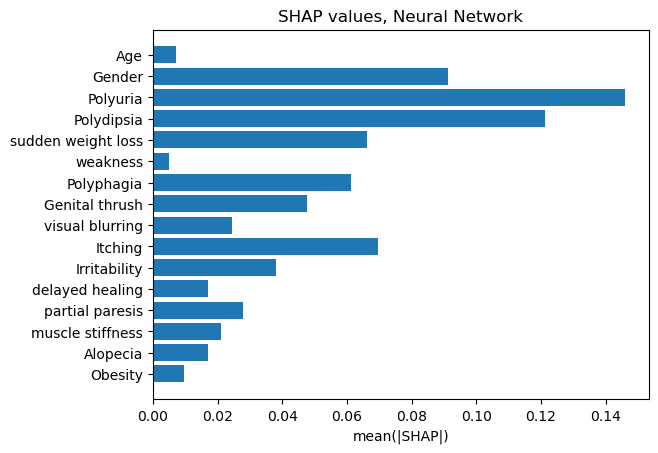

In [150]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))

ax.barh(y_pos, mean_shap_nn, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Neural Network')

plt.show()
